In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("hotel_bookings.csv")

In [3]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03/07/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03/07/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06/05/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/2015


In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

### For handling empty data on adults column

In [5]:
empty_adults=data[data['adults'].isna()]
empty_adults

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
740,Resort Hotel,1,74,2015,July,31,27,1,3,NaN,...,No Deposit,171.0,NaN,0,Transient,107.0,0,1,Canceled,29/06/2015


In [7]:
adults_median = data['adults'].median()
data['adults_filled']=data['adults'].fillna(adults_median)

In [8]:
data['adults_filled'].isna().sum()

0

### For children

In [10]:
data['children'].isna().sum()

4

In [13]:
empty_children=data[data['children'].isna()]
empty_children['children']

40600   NaN
40667   NaN
40679   NaN
41160   NaN
Name: children, dtype: float64

In [17]:
children_median = data['children'].median()
children_median

0.0

In [23]:
data['children_filled']=data['children'].fillna(children_median)

In [24]:
data['children_filled'].isna().sum()

0

In [25]:
data['children_filled']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children_filled, Length: 119390, dtype: float64

### For countries

In [28]:
data['country'].isna().sum()

507

In [37]:
mode_country = data['country'].mode()[0]
mode_country

'PRT'

In [38]:
data['country_filled']=data['country'].fillna(mode_country)

In [39]:
data['country_filled'].isna().sum()

0

### For Market Segment

In [40]:
data['market_segment']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 119390, dtype: object

In [41]:
mode_market = data['market_segment'].mode()[0]
mode_market

'Online TA'

In [43]:
data['market_segment_filled']=data['market_segment'].fillna(mode_market)
data['market_segment_filled']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment_filled, Length: 119390, dtype: object

In [44]:
data['market_segment_filled'].isna().sum()

0

### For distribution channel

In [46]:
data['distribution_channel']

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 119390, dtype: object

In [47]:
mode_channel = data['distribution_channel'].mode()[0]
mode_channel

'TA/TO'

In [48]:
data['distribution_channel_filled']=data['distribution_channel'].fillna(mode_channel)
data['distribution_channel_filled']

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel_filled, Length: 119390, dtype: object

In [49]:
data['distribution_channel_filled'].isna().sum()

0

### For reserved room type and assigned room type

In [53]:
data['reserved_room_type']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119390, dtype: object

In [54]:
data['assigned_room_type']

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 119390, dtype: object

In [55]:
mode_reserved = data['reserved_room_type'].mode()[0]
mode_reserved

'A'

In [56]:
mode_assigned = data['assigned_room_type'].mode()[0]
mode_assigned

'A'

In [57]:
data['reserved_room_type_filled']=data['reserved_room_type'].fillna(mode_reserved)
data['reserved_room_type_filled']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type_filled, Length: 119390, dtype: object

In [58]:
data['assigned_room_type_filled']=data['assigned_room_type'].fillna(mode_assigned)
data['assigned_room_type_filled']

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type_filled, Length: 119390, dtype: object

In [60]:
data['reserved_room_type_filled'].isna().sum()

0

In [61]:
data['assigned_room_type_filled'].isna().sum()

0

In [11]:
data.to_csv('hotel_bookings_modifiedd.csv', index=False)

### For deposit type

In [64]:
data['deposit_type']

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: object

In [65]:
data['deposit_type'].isna().sum()

21

In [67]:
mode_deposit = data['deposit_type'].mode()[0]
mode_deposit

'No Deposit'

In [69]:
data['deposit_type_filled']=data['deposit_type'].fillna(mode_deposit)
data['deposit_type_filled']

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type_filled, Length: 119390, dtype: object

In [70]:
data['deposit_type_filled'].isna().sum()

0

### For agent and company

In [71]:
data['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [72]:
data['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [76]:
# Let 0 be undefined ids of agent and company
data['agent_filled']=data['agent'].fillna(0)
data['company_filled']=data['company'].fillna(0)

In [77]:
data['agent_filled'].isna().sum()

0

In [78]:
data['company_filled'].isna().sum()

0

### For customer type

In [79]:
data['customer_type']

0         Transient
1         Transient
2         Transient
3         Transient
4         Transient
            ...    
119385    Transient
119386    Transient
119387    Transient
119388    Transient
119389    Transient
Name: customer_type, Length: 119390, dtype: object

In [82]:
mode_customer = data['customer_type'].mode()[0]
data['customer_type_filled']=data['customer_type'].fillna(mode_customer)
data['customer_type_filled'].isna().sum()

0

### For Reservation status

In [83]:
data['reservation_status']

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object

In [86]:
data['reservation_status'].isna().sum()

1

In [88]:
data.dropna(subset=['reservation_status'], inplace=True)

In [89]:
data['reservation_status'].isna().sum()

0

### Marks the ending of filling null values and imputation 

### 2. Descriptive Status

Calculate summary statistics (mean, median, mode, standard deviation, etc.) for
numerical columns like lead_time, stays_in_weekend_nights,
stays_in_week_nights, adults, children, babies, previous_cancellations,
previous_bookings_not_canceled, days_in_waiting_list, adr,
required_car_parking_spaces, and total_of_special_requests.

In [92]:
# Calculation of mean,median,mode,sd of the following columns.
# a. Leat_time
lead_time_mean = data['lead_time'].mean()
print(f"The mean value of lead_time is: ",lead_time_mean)

lead_time_median = data['lead_time'].median()
print("The median value is: ",lead_time_median)

lead_time_mode = data['lead_time'].mode()[0]
print("The mode value is: ",lead_time_mode)

# b. Stays_in_weekend_nights
print("\n")
stays_in_weekend_nights_mean = data['stays_in_weekend_nights'].mean()
print(f"The mean value of stays_in_weekend_nights is: ",stays_in_weekend_nights_mean)

stays_in_weekend_nights_median = data['stays_in_weekend_nights'].median()
print("The median value is: ",stays_in_weekend_nights_median)

stays_in_weekend_nights_mode = data['stays_in_weekend_nights'].mode()[0]
print("The mode value is: ",stays_in_weekend_nights_mode)

# c. Stays_in_week_nights
print("\n")
stays_in_week_nights_mean = data['stays_in_week_nights'].mean()
print(f"The mean value of lead_time is: ",stays_in_week_nights_mean)

stays_in_week_nights_median = data['stays_in_week_nights'].median()
print("The median value is: ",stays_in_week_nights_median)

stays_in_week_nights_mode = data['stays_in_week_nights'].mode()[0]
print("The mode value is: ",stays_in_week_nights_mode)

The mean value of lead_time is:  104.0113410783238
The median value is:  69.0
The mode value is:  0


The mean value of stays_in_weekend_nights is:  0.9275896439370461
The median value is:  1.0
The mode value is:  0


The mean value of lead_time is:  2.5002722193836955
The median value is:  2.0
The mode value is:  2


In [93]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adults_filled,children_filled,agent_filled,company_filled
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119388.000000,119385.000000,119389.000000,...,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370419,104.011341,2016.156564,27.165158,15.798239,0.927590,2.500272,1.856401,0.103891,0.007949,...,74.828385,10.775247,2.321169,101.831168,0.062518,0.571368,1.856402,0.103887,74.828385,10.775247
std,0.482919,106.863541,0.707471,13.605194,8.780866,0.998613,1.908267,0.579266,0.398563,0.097437,...,107.142399,53.944101,17.594793,50.535999,0.245292,0.792800,0.579263,0.398557,107.142399,53.944101
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,94.560000,0.000000,0.000000,2.000000,0.000000,9.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000,0.000000,152.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,10.000000,535.000000,543.000000


In [96]:
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_filled,market_segment_filled,distribution_channel_filled,reserved_room_type_filled,assigned_room_type_filled,desposit_type_filled,deposit_type_filled,customer_type_filled
count,119389,119389,119389,118882,119387,119388,119388,119388,119368,119358,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3,926,177,8,5,10,12,3,3,4
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015,PRT,Online TA,TA/TO,A,A,No Deposit,No Deposit,Transient
freq,79330,13877,92309,48570,56477,97868,85993,74052,104630,89585,75165,1461,49077,56479,97869,85994,74053,104651,104651,89616


### Data Visualization

In [97]:
# Histogram for is_canceled

(array([75165.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

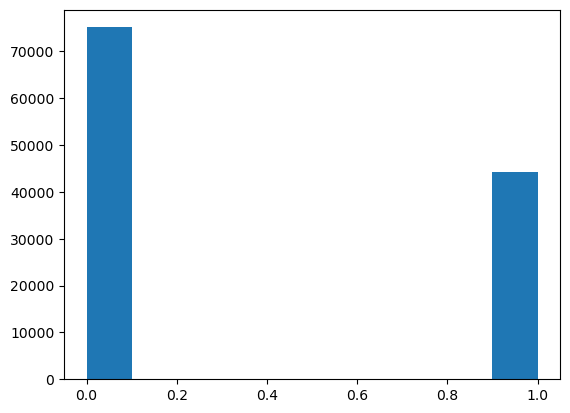

In [104]:
is_cancelled = data['is_canceled']
plt.hist(is_cancelled)

In [105]:
# Bar plots

In [4]:
years = data['arrival_date_year']
years

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119390, dtype: int64

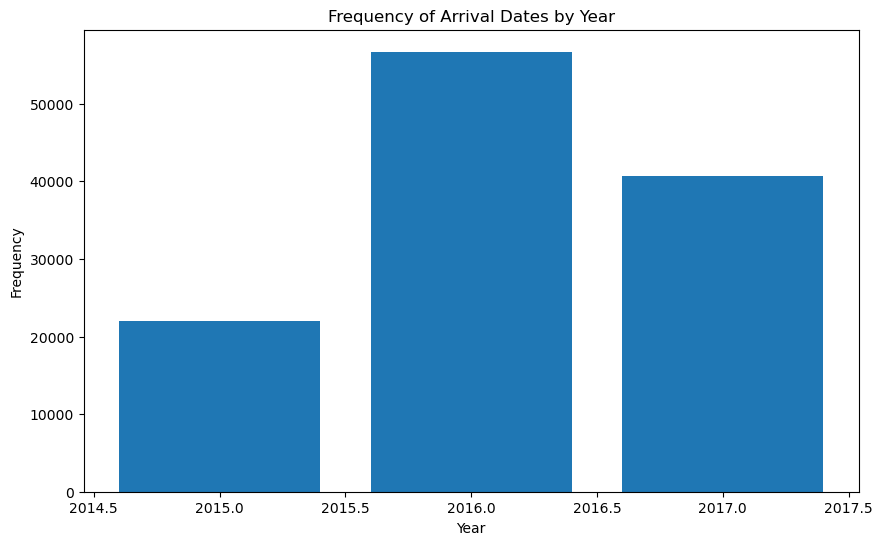

In [8]:
year_counts = data['arrival_date_year'].value_counts().sort_index()
years = year_counts.index
counts = year_counts.values
plt.figure(figsize=(10, 6))
plt.title('Frequency of Arrival Dates by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.bar(years,counts)
plt.show()

### Scatter Plot

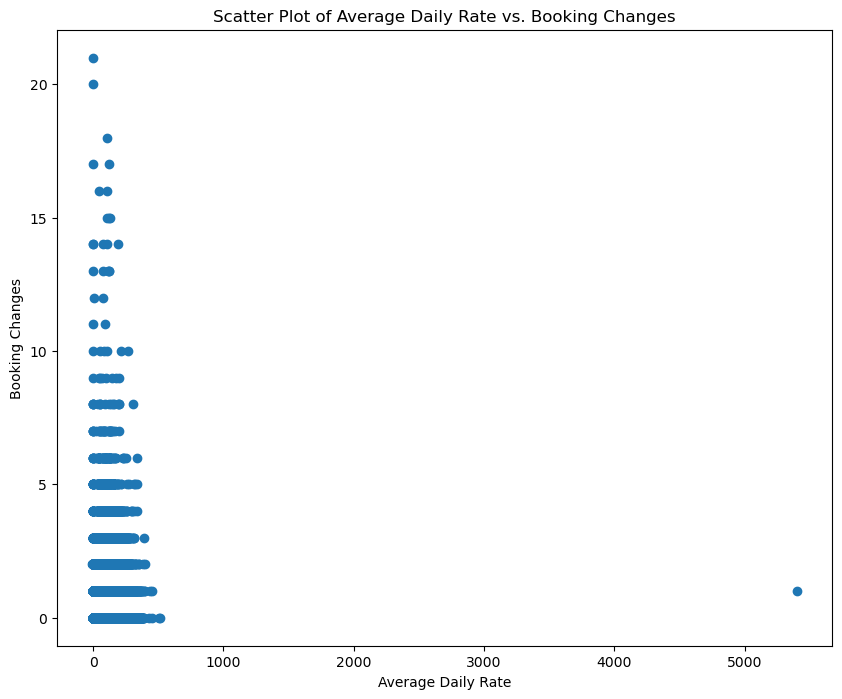

In [9]:
# Scatter plot of: Average Daily Rate vs. Booking Changes (not related)
plt.figure(figsize=(10, 8))
plt.scatter(x=data['adr'], y=data['booking_changes'])
plt.title('Scatter Plot of Average Daily Rate vs. Booking Changes')
plt.xlabel('Average Daily Rate')
plt.ylabel('Booking Changes')
plt.show()

### Correlation Analysis

In [10]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060015,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029639,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025908,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001569,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092975,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060015,0.119519,0.029639,0.025908,-0.001569,0.091871,0.092975,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051672,-0.035595,0.207793,-0.008283,0.230641,0.014785,0.122883
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889
